In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.tsa.api as smt 
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import LinearRegression

from numpy import polyfit

from matplotlib.pylab import rcParams

import statsmodels.tsa.stattools as ts

import random as random

In [3]:
data_chuva = pd.read_excel('C:\\Users\\mario\\Desktop\\UFPE\\correlacoes\\chuva_fortaleza (1).xlsx')

In [62]:
data_chuva['Ano'] = pd.to_datetime(data_chuva['Ano'], format='%Y')
serie  = pd.Series(data_chuva['Milimetros'].values, index=data_chuva['Ano'])

In [47]:
model = ts.ARMA(serie, (2,2)).fit()
print(model.summary())

C:\Users\mario\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  130
Model:                     ARMA(2, 2)   Log Likelihood                -981.675
Method:                       css-mle   S.D. of innovations            460.362
Date:                Wed, 19 Sep 2018   AIC                           1975.350
Time:                        11:10:54   BIC                           1992.555
Sample:                             0   HQIC                          1982.341
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1417.5250     57.797     24.526      0.000    1304.245    1530.805
ar.L1.y       -0.4917      0.412     -1.192      0.235      -1.300       0.316
ar.L2.y        0.3275      0.381      0.860      0.3

In [57]:
smt.graphics.plot_pacf(serie.dropna(), lags=24, alpha=0.05)

KeyError: 'Ano'

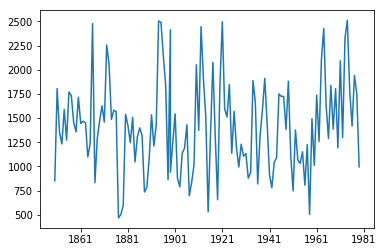

In [82]:
plt.plot(serie.index, serie, label="original")

In [49]:
prediction = model.predict()

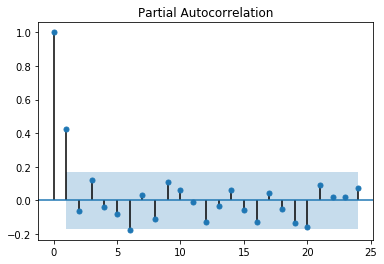

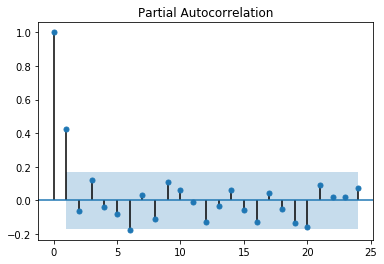

In [50]:
smt.graphics.plot_pacf(prediction.dropna(), lags=24, alpha=0.05)

In [51]:
result = adfuller(serie)
print('ADF Statistic for original serie: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
result = adfuller(prediction)
print('ADF Statistic for predicted serie: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic for original serie: -8.644058
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic for predicted serie: -7.091124
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [45]:
ts.kpss(serie)

C:\Users\mario\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.09960792938808165,
 0.1,
 13,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})